In [125]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [126]:
# Getting to know GEOJSON file:
hospital = geopandas.read_file("Hospitals_and_Medical_Centers.geojson")

In [127]:
hospital.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   OBJECTID      165 non-null    int64              
 1   source        143 non-null    object             
 2   ext_id        13 non-null     object             
 3   cat1          165 non-null    object             
 4   cat2          165 non-null    object             
 5   cat3          110 non-null    object             
 6   org_name      133 non-null    object             
 7   Name          165 non-null    object             
 8   addrln1       163 non-null    object             
 9   addrln2       11 non-null     object             
 10  city          163 non-null    object             
 11  state         163 non-null    object             
 12  hours         158 non-null    object             
 13  phones        164 non-null    object             
 14  ur

In [128]:
hospital['source'].unique()

array(['211', 'Current Services Locator',
       'HSIP Freedom Airports_Heliports',
       'LA County Department of Health Services',
       'HSIP Freedom Gnis_structures', nan], dtype=object)

In [129]:
hospital.drop(columns='ext_id', axis=1)

,OBJECTID,source,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,city,...,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y,geometry
0,9,211,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Verdugo Hills Hospital,1812 Verdugo Blvd.,NaN,Glendale,...,http://egis3.lacounty.gov/lms/?p=560,publish,34.204530,-118.216023,2016-01-29 10:45:00+00:00,NaN,NaN,6.496353e+06,1.896883e+06,POINT (-118.21602 34.20453)
1,11,211,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,NaN,Los Angeles,...,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,2016-01-21 15:56:47+00:00,NaN,NaN,6.486475e+06,1.850019e+06,POINT (-118.24831 34.07569)
2,20,211,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendora Community Hospital,150 W. Route 66,NaN,Glendora,...,http://egis3.lacounty.gov/lms/?p=568,publish,34.127307,-117.865075,2016-01-22 14:39:39+00:00,NaN,NaN,6.602504e+06,1.868737e+06,POINT (-117.86507 34.12731)
3,25,211,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,NaN,Torrance,...,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,2016-01-27 11:34:40+00:00,NaN,NaN,6.453221e+06,1.763848e+06,POINT (-118.35711 33.83863)
4,35,211,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,NaN,Glendale,...,http://egis3.lacounty.gov/lms/?p=570,publish,34.128058,-118.257443,2016-01-22 16:10:02+00:00,NaN,NaN,6.483758e+06,1.869083e+06,POINT (-118.25744 34.12806)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,71348,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,NaN,Culver City,...,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016-02-02 13:21:01+00:00,NaN,NaN,6.441390e+06,1.831059e+06,POINT (-118.39694 34.02320)
161,71349,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,NaN,Culver City,...,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016-02-02 13:21:01+00:00,NaN,NaN,6.441390e+06,1.831059e+06,POINT (-118.39694 34.02320)
162,71350,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,NaN,Culver City,...,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016-02-02 13:21:01+00:00,NaN,NaN,6.441390e+06,1.831059e+06,POINT (-118.39694 34.02320)
163,71351,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,NaN,Hollywood,...,http://egis3.lacounty.gov/lms/?p=80738,publish,34.096445,-118.325144,2016-02-03 11:38:45+00:00,NaN,NaN,6.463232e+06,1.857638e+06,POINT (-118.32514 34.09645)


In [130]:
hospital['cat1'].equals(hospital['cat2'])

False

In [131]:
hospital.columns

Index(['OBJECTID', 'source', 'ext_id', 'cat1', 'cat2', 'cat3', 'org_name',
       'Name', 'addrln1', 'addrln2', 'city', 'state', 'hours', 'phones', 'url',
       'info1', 'info2', 'post_id', 'description', 'zip', 'link', 'use_type',
       'latitude', 'longitude', 'date_updated', 'email', 'dis_status',
       'POINT_X', 'POINT_Y', 'geometry'],
      dtype='object')

In [132]:
# dropping the date update column
hospital = hospital.drop(columns='date_updated', axis =1)

In [133]:
hospital.dis_status.unique()

array([nan])

In [134]:
hospital = hospital.drop(columns='dis_status', axis =1)

In [135]:
hospital = hospital.drop(columns='email', axis =1)

In [136]:
hospital = hospital.drop(columns='phones', axis =1)

In [137]:
hospital.shape

(165, 26)

In [138]:
hospital = hospital.drop(columns='url', axis =1)

In [139]:
hospital = hospital.drop(columns='source', axis =1)

In [140]:
hospital = hospital.drop(columns='OBJECTID', axis =1)

In [141]:
hospital.columns

Index(['ext_id', 'cat1', 'cat2', 'cat3', 'org_name', 'Name', 'addrln1',
       'addrln2', 'city', 'state', 'hours', 'info1', 'info2', 'post_id',
       'description', 'zip', 'link', 'use_type', 'latitude', 'longitude',
       'POINT_X', 'POINT_Y', 'geometry'],
      dtype='object')

In [142]:
hospital.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ext_id       13 non-null     object  
 1   cat1         165 non-null    object  
 2   cat2         165 non-null    object  
 3   cat3         110 non-null    object  
 4   org_name     133 non-null    object  
 5   Name         165 non-null    object  
 6   addrln1      163 non-null    object  
 7   addrln2      11 non-null     object  
 8   city         163 non-null    object  
 9   state        163 non-null    object  
 10  hours        158 non-null    object  
 11  info1        10 non-null     object  
 12  info2        3 non-null      object  
 13  post_id      165 non-null    int64   
 14  description  165 non-null    object  
 15  zip          163 non-null    object  
 16  link         165 non-null    object  
 17  use_type     165 non-null    object  
 18  latitude     165 non-n

In [143]:
hospital['ext_id'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'CA86',
       'CA86', 'CA86', '1732851', '1732851', '1660655', '1732541',
       '1732731', '1660298', '1732699', '2130123', '1724329', '2084607',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=o

In [144]:
hospital = hospital.drop(columns='ext_id', axis =1)

In [145]:
# check for null values
hospital.isnull().sum()

cat1             0
cat2             0
cat3            55
org_name        32
Name             0
addrln1          2
addrln2        154
city             2
state            2
hours            7
info1          155
info2          162
post_id          0
description      0
zip              2
link             0
use_type         0
latitude         0
longitude        0
POINT_X          0
POINT_Y          0
geometry         0
dtype: int64

In [146]:
print(type(hospital))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [151]:
# removing null values from cat3, org_name, addrln1, city, state, hours, zip
hospital = hospital.dropna(subset=['cat3', 'org_name', 'addrln1', 'city', 'state', 'hours', 'zip'])


In [152]:
hospital

,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,city,state,hours,...,post_id,description,zip,link,use_type,latitude,longitude,POINT_X,POINT_Y,geometry
0,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Verdugo Hills Hospital,1812 Verdugo Blvd.,NaN,Glendale,CA,Administrative hours are Monday through Friday...,...,560,The facility provides health education and hos...,91208,http://egis3.lacounty.gov/lms/?p=560,publish,34.204530,-118.216023,6.496353e+06,1.896883e+06,POINT (-118.21602 34.20453)
1,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,NaN,Los Angeles,CA,Administrative hours are Monday through Friday...,...,561,For more than a century at Barlow Respiratory ...,90026,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,6.486475e+06,1.850019e+06,POINT (-118.24831 34.07569)
2,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendora Community Hospital,150 W. Route 66,NaN,Glendora,CA,24 hours a day,...,568,Services provided include comprehensive acute ...,91740,http://egis3.lacounty.gov/lms/?p=568,publish,34.127307,-117.865075,6.602504e+06,1.868737e+06,POINT (-117.86507 34.12731)
3,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,NaN,Torrance,CA,24 hours a day 7 days at week,...,569,Providence Little Company of Mary Medical Cent...,90503,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,6.453221e+06,1.763848e+06,POINT (-118.35711 33.83863)
4,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,NaN,Glendale,CA,"Monday through Friday, 9:00am to 5:00pm. Emer...",...,570,"Established in 1926, Glendale Memorial Hospita...",91204,http://egis3.lacounty.gov/lms/?p=570,publish,34.128058,-118.257443,6.483758e+06,1.869083e+06,POINT (-118.25744 34.12806)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Health and Mental Health,Hospitals and Medical Centers,Acute Care,Kindred Hospital,Kindred Hospital - Baldwin Park,14148 Francisquito Avenue,NaN,Baldwin Park,CA,"24 hours a day, 7 days at week.",...,80707,Our 91-bed transitional care hospital is locat...,91706,http://egis3.lacounty.gov/lms/?p=80707,publish,34.063033,-117.967521,6.571507e+06,1.845321e+06,POINT (-117.96752 34.06303)
155,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Verity,Saint Vincent Medical Center,2131 West Third Street,NaN,Los Angeles,CA,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,...,80727,St. Vincent Medical Center is committed to imp...,90057,http://egis3.lacounty.gov/lms/?p=80727,publish,34.063818,-118.273655,6.478789e+06,1.845718e+06,POINT (-118.27365 34.06382)
156,Health and Mental Health,Hospitals and Medical Centers,Acute Care,Verity,Saint Vincent Medical Center,2131 West Third Street,NaN,Los Angeles,CA,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,...,80727,St. Vincent Medical Center is committed to imp...,90057,http://egis3.lacounty.gov/lms/?p=80727,publish,34.063818,-118.273655,6.478789e+06,1.845718e+06,POINT (-118.27365 34.06382)
158,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Prime Healthcare Services,San Dimas Community Hospital,"1350 W Covina Blvd,",NaN,San Dimas,CA,"24 hours a day, 7 days a week.",...,80729,<strong>San Dimas Community Hospital</strong> ...,91773,http://egis3.lacounty.gov/lms/?p=80729,publish,34.097612,-117.834659,6.611727e+06,1.857944e+06,POINT (-117.83466 34.09761)


In [156]:
hospital['info1'].values
hospital['info2'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, '864', '864', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [157]:
# info1 and info2 have number of bed spaces but have a lot of missing values and imputation wouldn't be a good idea on this
hospital = hospital.drop(columns=['info1', 'info2'], axis = 1)

In [158]:
hospital.shape

(100, 20)

In [160]:
hospital['addrln2'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'Mail Stop #59', 'Mail Stop #59', 'Mail Stop #59', nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan], dtype=object)

In [161]:
# dropping the addrln2 column
hospital = hospital.drop(columns='addrln2', axis =1)

In [164]:
hospital.shape

(100, 19)

<AxesSubplot: >

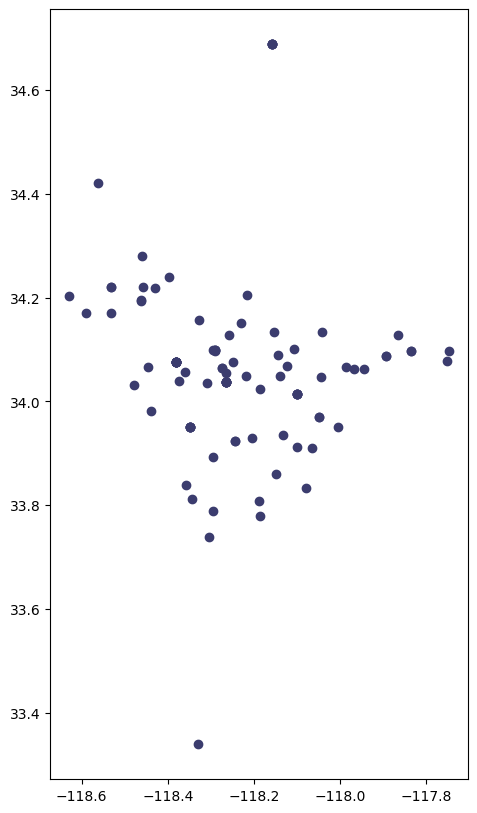

In [162]:
hospital.plot(figsize=(10,10), color='#3B3C6E')

## Histogram Plot

In [166]:
hospital.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 100 entries, 0 to 159
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   cat1         100 non-null    object  
 1   cat2         100 non-null    object  
 2   cat3         100 non-null    object  
 3   org_name     100 non-null    object  
 4   Name         100 non-null    object  
 5   addrln1      100 non-null    object  
 6   city         100 non-null    object  
 7   state        100 non-null    object  
 8   hours        100 non-null    object  
 9   post_id      100 non-null    int64   
 10  description  100 non-null    object  
 11  zip          100 non-null    object  
 12  link         100 non-null    object  
 13  use_type     100 non-null    object  
 14  latitude     100 non-null    float64 
 15  longitude    100 non-null    float64 
 16  POINT_X      100 non-null    float64 
 17  POINT_Y      100 non-null    float64 
 18  geometry     100 non-n

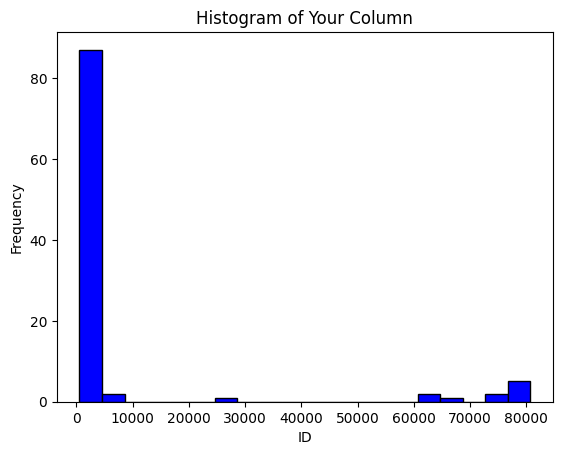

In [167]:
# Select the column you want to plot
column = hospital['post_id']

# Plot the histogram
plt.hist(column, bins=20, color='blue', edgecolor='black')

# Add labels and title to the plot
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.title('Histogram of Your Column')

# Show the plot
plt.show()

In [170]:
# there is a big variation in the values in the post id- maybe these ids are tied with location like zip code

## Scatter plot

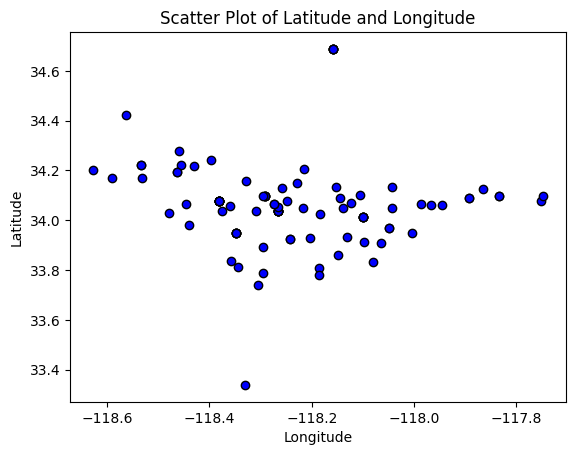

In [172]:
# Plot the scatter plot
plt.scatter(hospital['longitude'], hospital['latitude'], color='blue', edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude')

# Show the plot
plt.show()

## Map using Folium

In [188]:
# import the library
import folium

# # Make an empty map
# m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# # Show the map
# m

In [189]:
# add marker one by one on the map
for i in range(0,len(hospital)):
   folium.Marker(
      location=[hospital.iloc[i]['latitude'], hospital.iloc[i]['longitude']],
      popup=hospital.iloc[i]['city'],
   ).add_to(m)

# Show the map again
m